## Waste Management using CNN Model

pip install opencv-python

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:20<00:00, 22.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [4]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
# Visualization
# from cv2 import cvtColor
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:04<00:00, 2494.93it/s]


In [6]:
data.shape

(22564, 2)

In [7]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

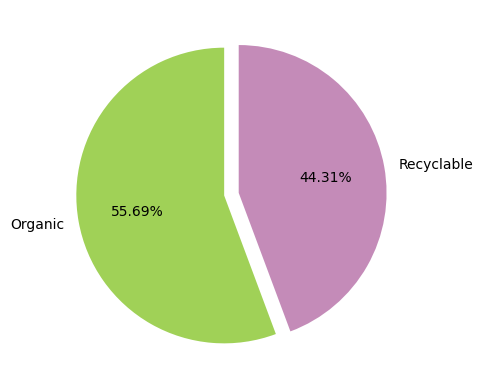

In [8]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()

In [9]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

### CNN - Convolutional Neural Network

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [ ]:
model.summary()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

In [19]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)


Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 57s 151ms/step - accuracy: 0.7685 - loss: 0.5524 - val_accuracy: 0.8691 - val_loss: 0.3728
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.8463 - loss: 0.3814 - val_accuracy: 0.8683 - val_loss: 0.3085
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.8526 - loss: 0.3632 - val_accuracy: 0.8711 - val_loss: 0.3270
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.8721 - loss: 0.3278 - val_accuracy: 0.8878 - val_loss: 0.2905
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 144ms/step - accuracy: 0.8867 - loss: 0.2928 - val_accuracy: 0.8953 - val_loss: 0.2893
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 48s 137ms/step - accuracy: 0.9024 - loss: 0.2504 - val_accuracy: 0.9077 - val_loss: 0.2789
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 144ms/step - accuracy: 0.9223 - loss: 0.2113 - val_accuracy: 0.8890 - val_loss: 0.3397
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 146ms/step - accuracy: 0.9368 - loss: 0

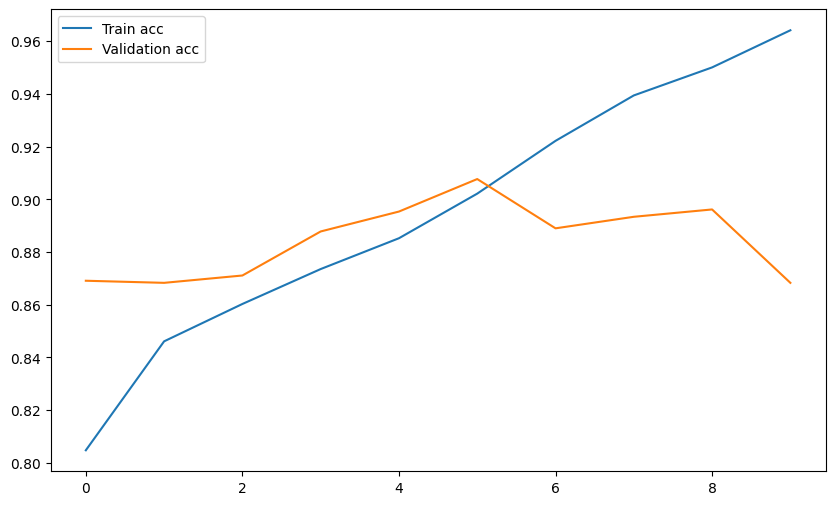

In [20]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

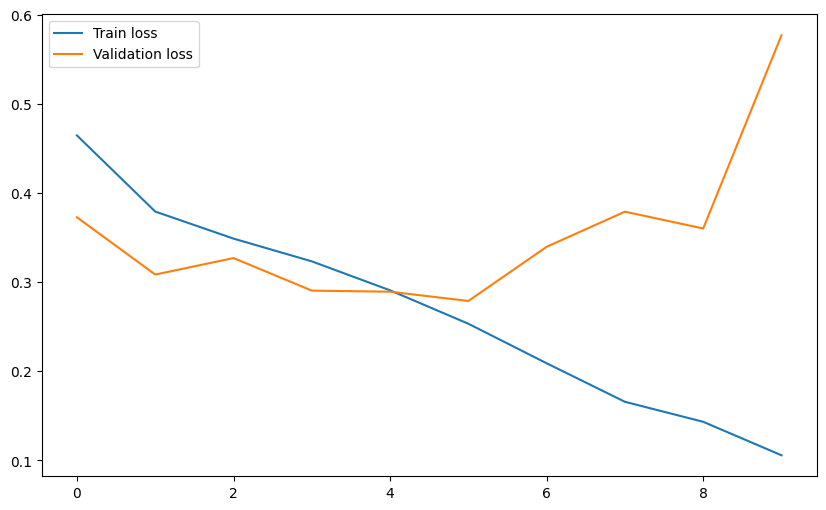

In [21]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [22]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
This image shows organic waste


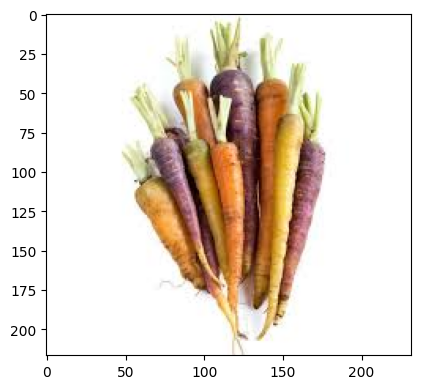

In [36]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/O/O_12574.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This image shows recyclable waste


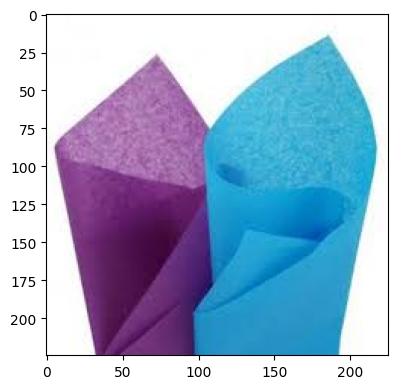

In [24]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

In [56]:
def save_model(model, filename):
    model.save(filename)  # No need for format argument in Keras 3
    print(f"Model saved successfully as {filename}")

# Save your model as .keras
save_model(model, "cnn_model.keras")


Model saved successfully as cnn_model.keras


In [30]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [57]:
code = """
import streamlit as st
import pickle
import io
import cv2
import numpy as np
import tensorflow as tf

# Load the model from pickle file
@st.cache_resource
def load_model():
    return tf.keras.models.load_model("/content/cnn_model.keras")

model = load_model()

# Function to predict waste type
def predict_func(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (224, 224))
    img_resized = np.reshape(img_resized, [-1, 224, 224, 3])

    result = np.argmax(model.predict(img_resized))
    return "Recyclable Waste" if result == 0 else "Organic Waste"

# Streamlit UI
st.title("Waste Classification Prototype")

uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Convert the uploaded file to an OpenCV image
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    img = cv2.imdecode(file_bytes, 1)

    # Display the image
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Predict and display the result
    prediction = predict_func(img)
    st.write(f"### Prediction: {prediction}")
"""

# Save to a file
with open("app.py", "w") as file:
    file.write(code)


In [58]:
!streamlit run app.py &>/dev/null &


In [59]:
from pyngrok import ngrok

# Kill old tunnels if necessary
!pkill -9 ngrok

# Start new tunnel
public_url = ngrok.connect(8501)
print("Streamlit App URL:", public_url)


Streamlit App URL: NgrokTunnel: "https://805c-34-87-47-54.ngrok-free.app" -> "http://localhost:8501"
